# Introduction

For this "end-of-phase" project within the Flatiron School Data Science curriculum, I will be investigating a dataset from BoardGameGeek that includes information about more than 100,000 board games.

#About the Data

The dataset is taken from BoardGameGeek, LLC, an online forum for board game enthusiasts and is also a board game database that includes reviews, images, and videos for over 100,000 different tabletop games.

The BGG dataset includes information about over 20,000 board games and its features, such as the average rating, complexity average, play time, minimum and maximum players, etc.

Firstly, import the four major pythong packages needed for the analyses:

- Pandas
- NumPy
- Matplotlib
- Seaborn

In [2]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Data Loading and Overview



In [3]:
#Using pandas to read the csv file into a dataframe named "bgg"
#Encoding helps ignore any symbols or unknowns from the dataset that may cause error in the csv reading process.
#read csv

bgg = pd.read_csv('BGG_Data_Set.csv', encoding = 'ISO-8859-1')

##Basic Diagnostics

In [4]:
#check columns and have them on hand for later analyses if needed

bgg.columns

Index(['ID', 'Name', 'Year Published', 'Min Players', 'Max Players',
       'Play Time', 'Min Age', 'Users Rated', 'Rating Average', 'BGG Rank',
       'Complexity Average', 'Owned Users', 'Mechanics', 'Domains'],
      dtype='object')

In [5]:
#check first 5 rows to ensure the reading of the csv file was successful

bgg.head()

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,8.79,1,3.86,68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,8.61,2,2.84,65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,8.66,3,3.91,28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,8.43,4,3.24,87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,8.70,5,4.22,16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"


In [6]:
#general info about the dataset

bgg.info()

#from initial screening, there seems to be a few null values for the ID, Owned Users, and Year Published columns.
#there are a large amount of null values in Mechanics and Domains columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20327 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20342 non-null  float64
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  float64
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  float64
 11  Owned Users         20320 non-null  float64
 12  Mechanics           18745 non-null  object 
 13  Domains             10184 non-null  object 
dtypes: float64(5), int64(6), object(3)
memory usage: 2.2+ MB


In [7]:
#some statistics for the columns that are numerical features

bgg.describe()

#Year Published column has a minimum value of -3500 that would likely need to be investigated

,ID,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users
count,20327.000000,20342.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20320.000000
mean,108216.245142,1984.249877,2.019712,5.672221,91.294548,9.601485,840.971391,6.403227,10172.890429,1.991188,1408.457628
std,98682.097298,214.003181,0.690366,15.231376,545.447203,3.645458,3511.562220,0.935911,5872.831597,0.848903,5040.179315
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.050000,1.000000,0.000000,0.000000
25%,11029.000000,2001.000000,2.000000,4.000000,30.000000,8.000000,55.000000,5.820000,5087.500000,1.330000,146.000000
50%,88931.000000,2011.000000,2.000000,4.000000,45.000000,10.000000,120.000000,6.430000,10173.000000,1.970000,309.000000
75%,192939.500000,2016.000000,2.000000,6.000000,90.000000,12.000000,385.000000,7.030000,15258.500000,2.540000,864.000000
max,331787.000000,2022.000000,10.000000,999.000000,60000.000000,25.000000,102214.000000,9.580000,20344.000000,5.000000,155312.000000


In [8]:
#oldest game

print("Oldest game in the data was published in:", min(bgg["Year Published"]))

Oldest game in the data was published in: -3500.0


In [9]:
#row of the oldest game

bgg.loc[bgg['Year Published'].idxmin()]

,8174
ID,2399.0
Name,Senet
Year Published,-3500.0
Min Players,2
Max Players,2
Play Time,30
Min Age,6
Users Rated,664
Rating Average,5.82
BGG Rank,8176


Senet is a board game from ancient Egypt, with earliest representation dating back to 2620 BCE from the Mastaba of Hesy-Re.

In [10]:
#some statistics about the non-numerical features

bgg.describe(include = 'O')

,Name,Mechanics,Domains
count,20343,18745,10184
unique,19974,7381,39
top,Robin Hood,Hand Management,Wargames
freq,6,432,3029


##Data Cleaning and Null Value Imputation
Data cleaning needs observed from basic diagnostics:
- Deal with columns with less null values first.
- Deal with negative 'Year Published' values if they still persist.
- Remove decimals places from columns that do not need it.
- Complete null value imputation for 'Mechanics' and 'Domains' columns.

In [11]:
#identify the number of null values in each column

bgg.isna().sum()

,0
ID,16
Name,0
Year Published,1
Min Players,0
Max Players,0
Play Time,0
Min Age,0
Users Rated,0
Rating Average,0
BGG Rank,0


In [12]:
#show rows that possess ID null values

columns_with_null = bgg[bgg['ID'].isnull()]
columns_with_null

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
10776,NaN,Ace of Aces: Jet Eagles,1990.0,2,2,20,10,110,6.26,10778,2.00,NaN,NaN,NaN
10835,NaN,Die Erben von Hoax,1999.0,3,8,45,12,137,6.05,10837,2.00,NaN,NaN,NaN
11152,NaN,Rommel in North Africa: The War in the Desert ...,1986.0,2,2,0,12,53,6.76,11154,4.00,NaN,NaN,NaN
11669,NaN,Migration: A Story of Generations,2012.0,2,4,30,12,49,7.20,11671,2.00,NaN,NaN,NaN
12649,NaN,Die Insel der steinernen Wachter,2009.0,2,4,120,12,49,6.73,12651,3.00,NaN,NaN,NaN
12764,NaN,Dragon Ball Z TCG (2014 edition),2014.0,2,2,20,8,33,7.03,12766,2.50,NaN,NaN,NaN
13282,NaN,Dwarfest,2014.0,2,6,45,12,82,6.13,13284,1.75,NaN,NaN,NaN
13984,NaN,Hus,NaN,2,2,40,0,38,6.28,13986,2.00,NaN,NaN,NaN
14053,NaN,Contrario 2,2006.0,2,12,0,14,37,6.30,14055,1.00,NaN,NaN,NaN
14663,NaN,Warage: Extended Edition,2017.0,2,6,90,10,49,7.64,14665,3.00,NaN,NaN,NaN


Due to the overall low number of user ratings and abundance of null values in other columns as well, these 16 columns will be dropped and should not make significant impact on overall analyses.

In [13]:
#drop nulls

bgg_a = bgg.dropna(subset = 'ID')

#bgg_a for now because more filtering and cleaning will need to happen

In [14]:
#check that nulls are gone

bgg_a.isna().sum()

#luckily, this also dealt with the 'Year Published' null as well as most 'Owned Users' nulls

,0
ID,0
Name,0
Year Published,0
Min Players,0
Max Players,0
Play Time,0
Min Age,0
Users Rated,0
Rating Average,0
BGG Rank,0


In [15]:
#check null values of 'Owned Users' column

columns_with_null_ou = bgg_a[bgg_a['Owned Users'].isnull()]
columns_with_null_ou

#the low number of Users Rated for these rows also indicate that it will likely be dropped in later filtering anyways

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
2828,202755.0,Guildhall Fantasy: Fellowship,2016.0,2,4,45,10,565,7.13,2830,2.00,NaN,"Hand Management, Take That, Set Collection",NaN
3590,196305.0,Guildhall Fantasy: Alliance,2016.0,2,4,45,10,360,7.20,3592,2.14,NaN,"Hand Management, Set Collection, Take That",NaN
3739,196306.0,Guildhall Fantasy: Coalition,2016.0,2,4,45,10,336,7.19,3741,2.13,NaN,"Hand Management, Set Collection, Take That",NaN
5807,289.0,Chariot Lords,1999.0,3,4,360,12,221,6.68,5809,3.00,NaN,"Area Movement, Variable Player Powers",NaN
9202,6813.0,Operation Market Garden: Descent into Hell,1985.0,2,2,120,12,94,6.72,9204,3.00,NaN,"Dice Rolling, Events, Grid Movement, Hexagon G...",NaN
9317,139.0,Hoax,1981.0,3,12,45,10,216,5.97,9319,1.38,NaN,"Deduction, Hidden Roles, Voting",NaN
10075,266756.0,Devil Boats: PT Boats in the Solomons,2021.0,1,1,60,14,49,7.84,10077,2.83,NaN,NaN,NaN


In [16]:
#drop 'Owned Users' null values

bgg_clean = bgg_a.dropna(subset = 'Owned Users')
bgg_clean.isna().sum()

,0
ID,0
Name,0
Year Published,0
Min Players,0
Max Players,0
Play Time,0
Min Age,0
Users Rated,0
Rating Average,0
BGG Rank,0


In [17]:
#remove decimal places from columns 'Year Published' and 'Owned Users'

remove_decimal_columns = ['Year Published', 'Owned Users']
bgg_clean[remove_decimal_columns] = bgg_clean[remove_decimal_columns].apply(lambda x: x.astype(int))

bgg_clean

<ipython-input-17-b176245a2a04>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bgg_clean[remove_decimal_columns] = bgg_clean[remove_decimal_columns].apply(lambda x: x.astype(int))


,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017,1,4,120,14,42055,8.79,1,3.86,68323,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015,2,4,60,13,41643,8.61,2,2.84,65294,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018,2,4,120,14,19217,8.66,3,3.91,28785,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,167791.0,Terraforming Mars,2016,1,5,120,12,64864,8.43,4,3.24,87099,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,233078.0,Twilight Imperium: Fourth Edition,2017,3,6,480,14,13468,8.70,5,4.22,16831,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20338,16398.0,War,0,2,2,30,4,1340,2.28,20340,1.00,427,NaN,Children's Games
20339,7316.0,Bingo,1530,2,99,60,5,2154,2.85,20341,1.05,1533,"Betting and Bluffing, Bingo, Pattern Recognition",Party Games
20340,5048.0,Candy Land,1949,2,4,30,3,4006,3.18,20342,1.08,5788,Roll / Spin and Move,Children's Games
20341,5432.0,Chutes and Ladders,-200,2,6,30,3,3783,2.86,20343,1.02,4400,"Dice Rolling, Grid Movement, Race, Roll / Spin...",Children's Games


In [18]:
#we need to deal with the large amount of null values in the Domains and Mechanics
#due to the inherently large amount of null values in these columns, dropping is not appropriate
#we can fill it with 'Unknown Domain' and 'Unknown Mechanics'

bgg_clean['Domains'] = bgg_clean['Domains'].fillna('Unknown Domain')
bgg_clean['Mechanics'] = bgg_clean['Mechanics'].fillna('Unknown Mechanics')
bgg_clean

<ipython-input-18-477604188ce7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bgg_clean['Domains'] = bgg_clean['Domains'].fillna('Unknown Domain')
<ipython-input-18-477604188ce7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bgg_clean['Mechanics'] = bgg_clean['Mechanics'].fillna('Unknown Mechanics')


,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017,1,4,120,14,42055,8.79,1,3.86,68323,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015,2,4,60,13,41643,8.61,2,2.84,65294,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018,2,4,120,14,19217,8.66,3,3.91,28785,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,167791.0,Terraforming Mars,2016,1,5,120,12,64864,8.43,4,3.24,87099,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,233078.0,Twilight Imperium: Fourth Edition,2017,3,6,480,14,13468,8.70,5,4.22,16831,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20338,16398.0,War,0,2,2,30,4,1340,2.28,20340,1.00,427,Unknown Mechanics,Children's Games
20339,7316.0,Bingo,1530,2,99,60,5,2154,2.85,20341,1.05,1533,"Betting and Bluffing, Bingo, Pattern Recognition",Party Games
20340,5048.0,Candy Land,1949,2,4,30,3,4006,3.18,20342,1.08,5788,Roll / Spin and Move,Children's Games
20341,5432.0,Chutes and Ladders,-200,2,6,30,3,3783,2.86,20343,1.02,4400,"Dice Rolling, Grid Movement, Race, Roll / Spin...",Children's Games


In [19]:
#check to see if there are any null values left

bgg_clean.isna().sum()

#now we have a null-less dataset saved to bgg_clean, which means we can begin descriptive analyses

,0
ID,0
Name,0
Year Published,0
Min Players,0
Max Players,0
Play Time,0
Min Age,0
Users Rated,0
Rating Average,0
BGG Rank,0


#Descriptive Analyses

##Descriptive Questions:


- Which games have the most owned users?
- Which year had the most games published?
- Is there any correlation between numerical features in the dataset?
- **If there is correlation, create appropriate graph for visualization.**
- **What are the most popular mechanics and domains?**
- What are the trendy features in the most recent three years of the dataset?
- What is the spread of 'Users Rated' of the dataset? Should all rows of data be weighted equally?
- **What are the most common features within the top 3,000 board games?**
  - **Average Rating**
  - **Mechanics**
  - **Domains**









### Which games have the most owned users?
This question will need to be filtered to the top 50 games based on owned users to avoid a cluttered graph.

In [20]:
#sort data from highest to lowest owned users

top_50 = bgg_clean.sort_values(by='Owned Users', ascending=False).head(50)

(<Figure size 2800x800 with 1 Axes>,
 <Axes: title={'center': 'Top 50 Board Games by Owned Users'}, xlabel='Board Game Name', ylabel='Owned Users'>)

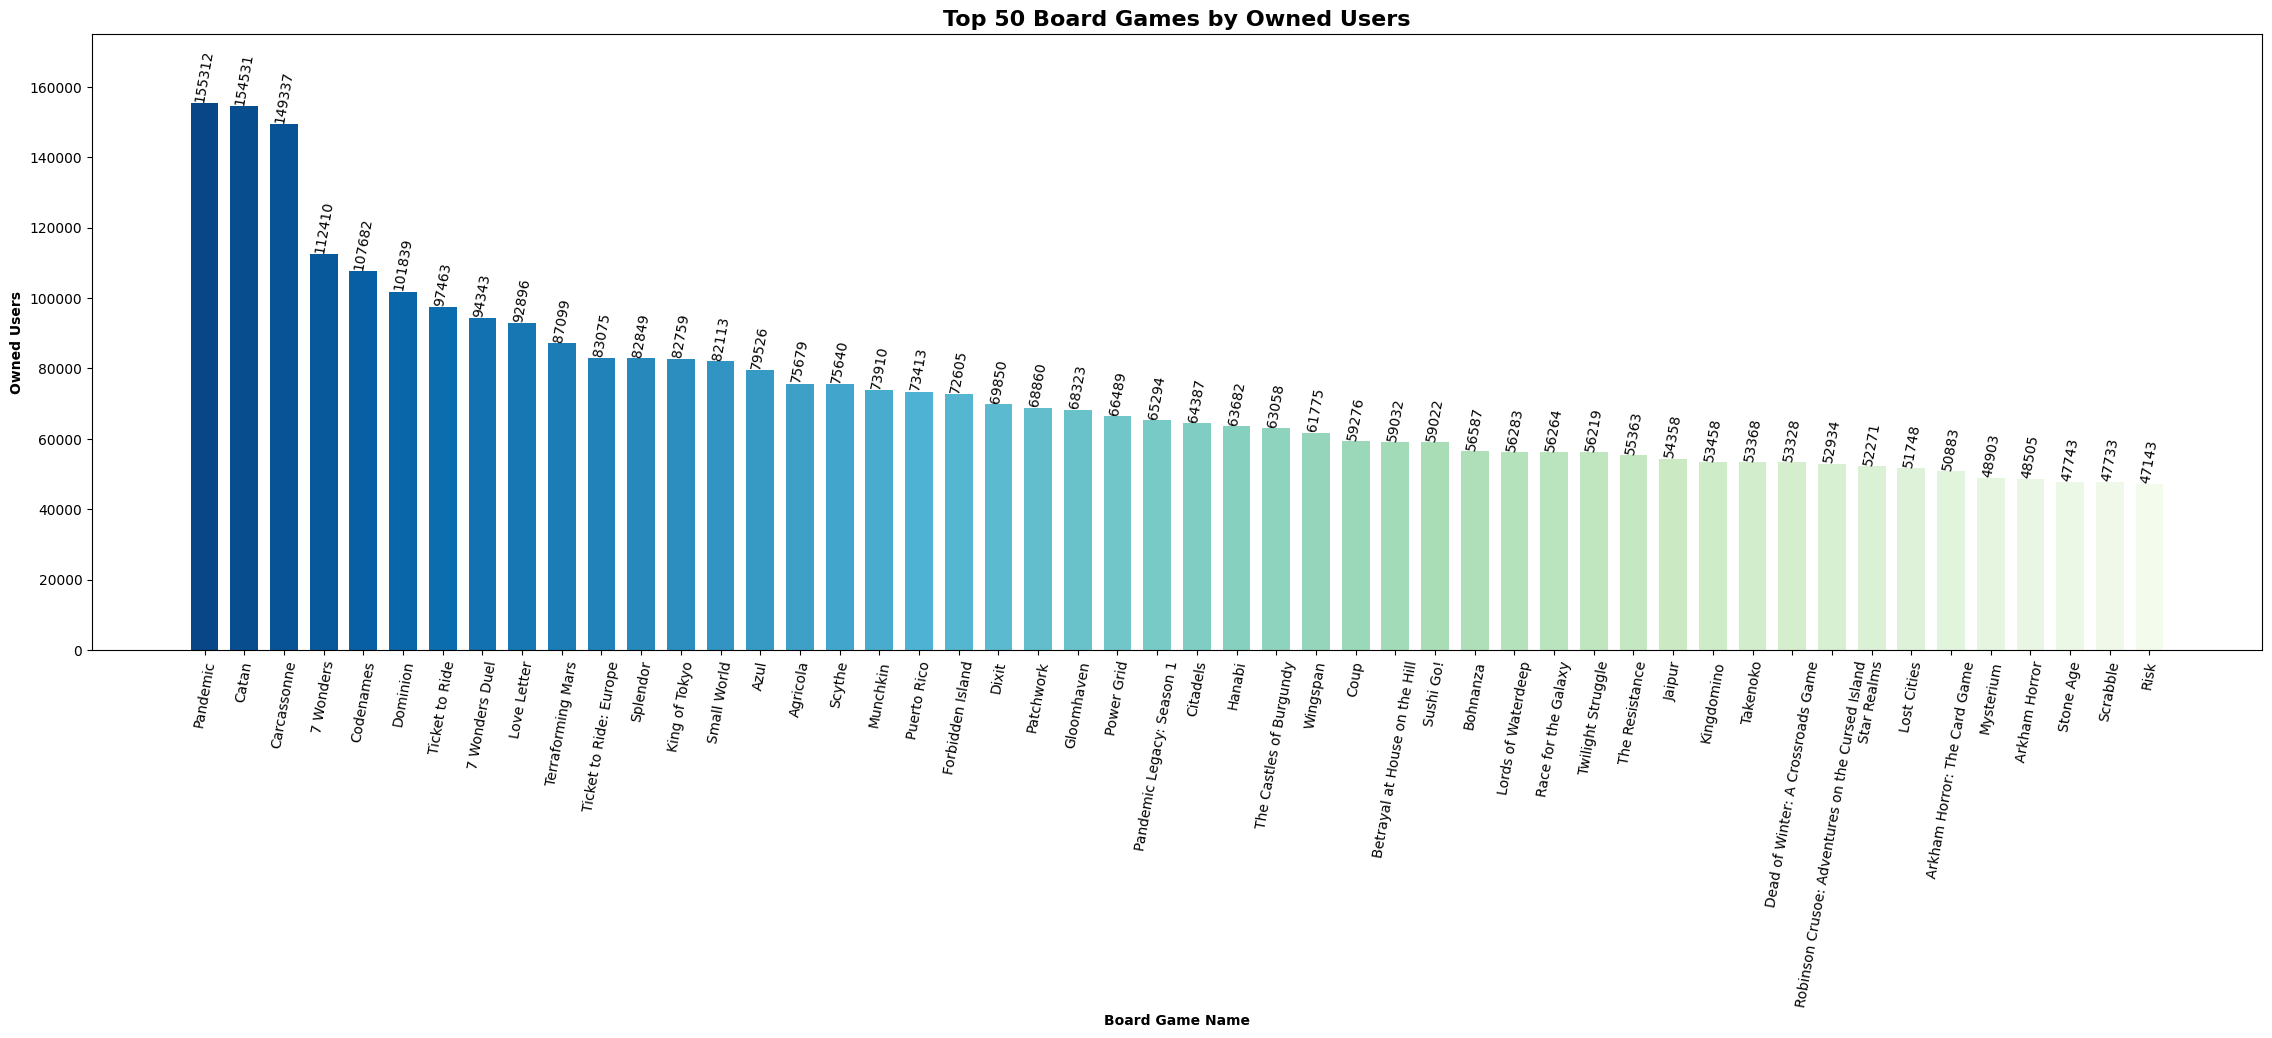

In [21]:
#write function to create bar graphs comparing a feature to the name of the top 50 in that feature
def bar_chart_name(feature, color):
    top_50 = bgg_clean.sort_values(by=feature, ascending=False).head(50)
    fig, ax = plt.subplots(figsize=(28, 8))
    palette = sns.color_palette(color, 50)[::-1]
    name_x = top_50['Name']
    feature_y = top_50[feature]
    bars = ax.bar(name_x, feature_y, color = palette, width = 0.7)
    plt.xlabel('Board Game Name', fontweight='bold')
    plt.ylabel(feature, fontweight='bold')
    plt.title(f'Top 50 Board Games by {feature}', fontsize=16, fontweight='bold')
    plt.ylim(0, 175000)
    plt.xticks(rotation = 80)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.8,
                f'{height}', ha='center', va='bottom', color='black', fontsize=10, rotation=80)
    return fig, ax

bar_chart_name('Owned Users', 'GnBu')

(<Figure size 2800x800 with 1 Axes>,
 <Axes: title={'center': 'Top 50 Board Games by Users Rated'}, xlabel='Board Game Name', ylabel='Users Rated'>)

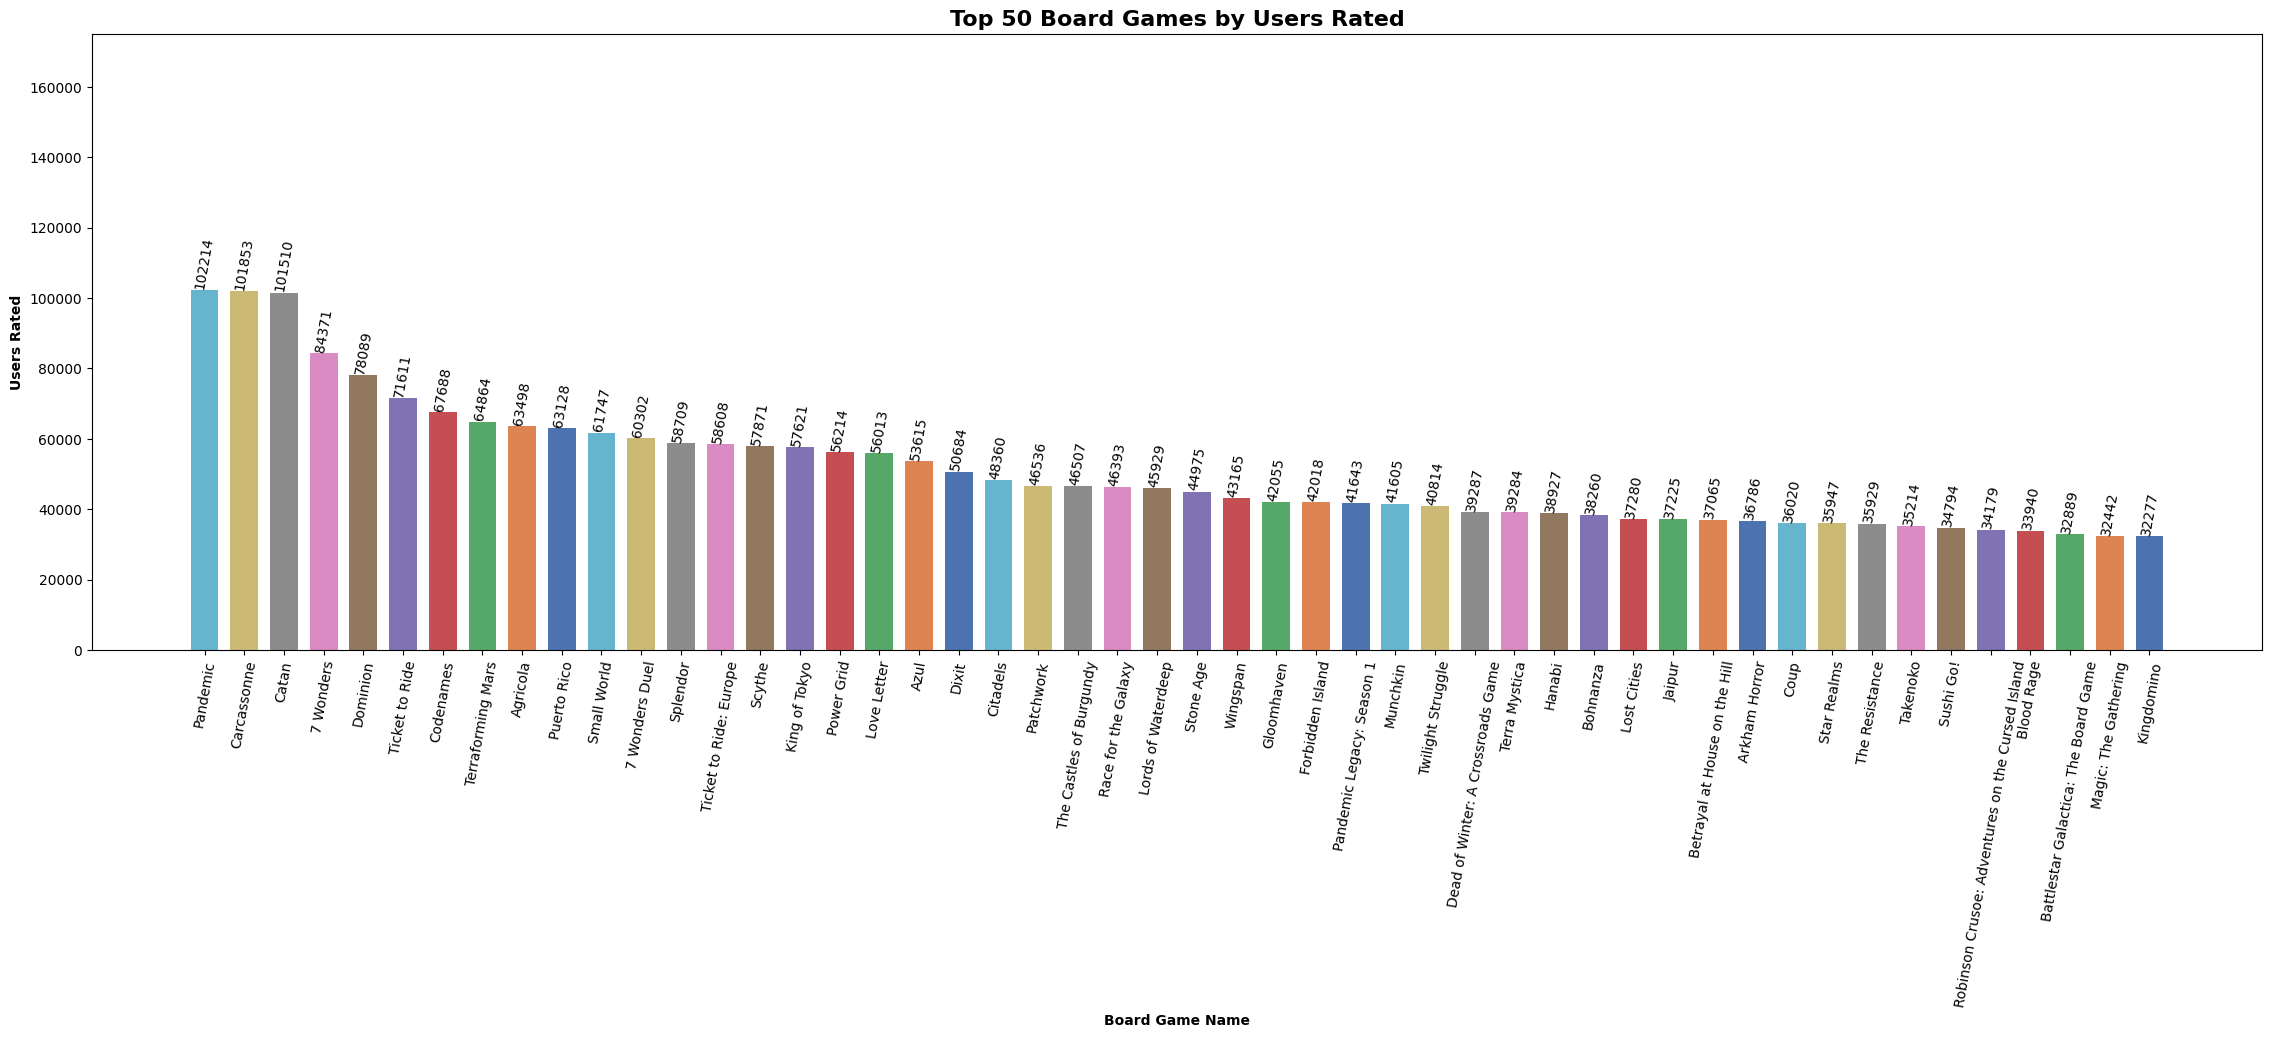

In [22]:
#try function with a different feature

bar_chart_name('Users Rated', 'deep')

These graphs show some of the most popular board games based on how many users rated them on BGG or how many have reported that they own the game.

### Which year had the most games published?
For this question, I am going to count up each game published in a certain year and express it in a graph

In [23]:
#due to the wide range of years, we will filter the graph to only show data between 1985 and 2022 since majority of data points lie between that range
filtered_bgg_clean = bgg_clean[(bgg_clean['Year Published'] >= 1985) & (bgg_clean['Year Published'] <= 2022)]

<ipython-input-24-b5dceebd85ae>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_bgg_clean, x='Year Published', palette='GnBu')


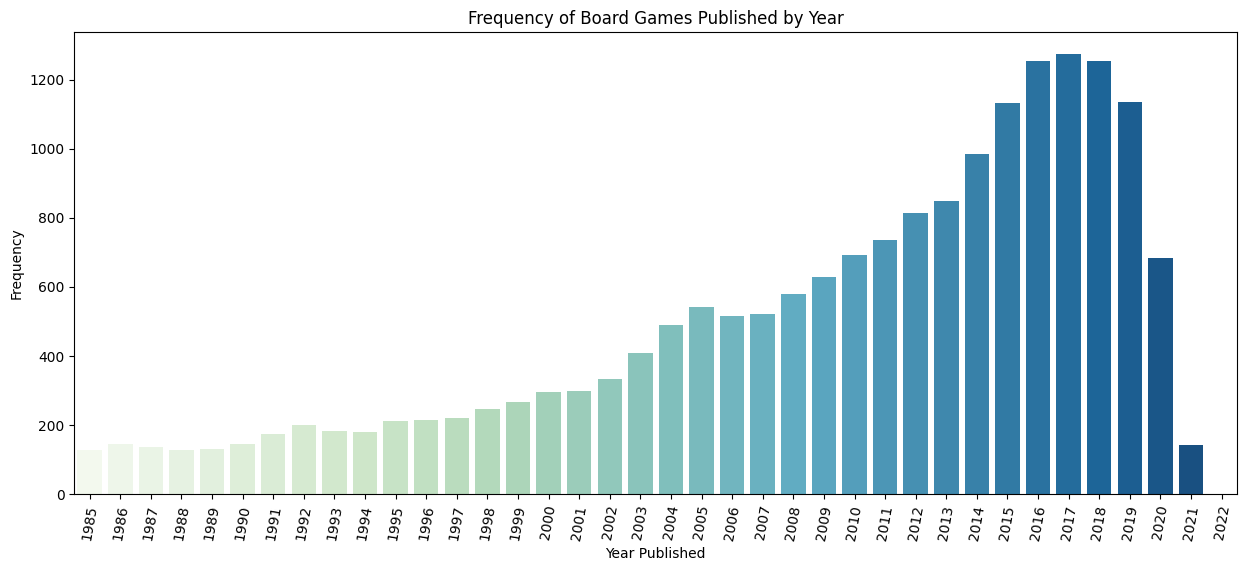

In [24]:
#create bar chart
fig, ax = plt.subplots(figsize=(15, 6))

sns.countplot(data=filtered_bgg_clean, x='Year Published', palette='GnBu')
plt.title('Frequency of Board Games Published by Year')
plt.ylabel('Frequency')
plt.xticks(rotation = 80)
plt.show()

Interpretation:
According to the bar graph, most games were published between 2005 and 2020. This could be due to more available resources (better technology) to create board games. Another reason could be an increase in data availibility after the 2000s.

### Is there any correlation between the numerical features in the dataset?

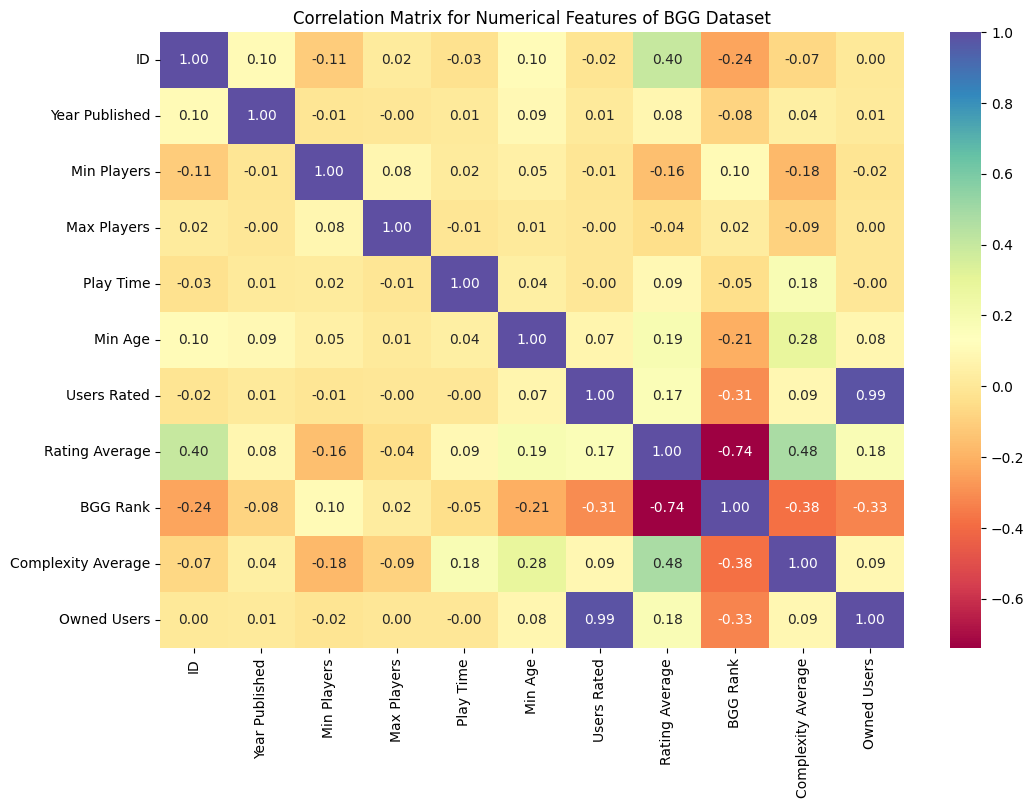

In [25]:
#correlation matrix to identify any correlation between numerical features

num_bgg_clean = bgg_clean.select_dtypes(include=[np.number])

matrix = num_bgg_clean.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(matrix, annot=True, cmap='Spectral', fmt='.2f')
plt.title('Correlation Matrix for Numerical Features of BGG Dataset')
plt.show()

Interpretation:
Most numerical values do not show correlation based on the Pearson correlation coefficient. There seems to be negative correlation between BGG Rank and Rating Average. This makes sense because as the rating increases, the ranking would decrease (indicating a better game) thus creating a strong negative correlation.

Complexity Average and Rating Average also seem to show a moderate positive correlation.

### If the matrix correlation identified any correlations worth dissecting, create visuals for them.
- Rating Average vs. Complexity Average
- Rating Average vs. BGG Rank

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Complexity Average vs. Rating Average'}, xlabel='Complexity Average', ylabel='Rating Average'>)

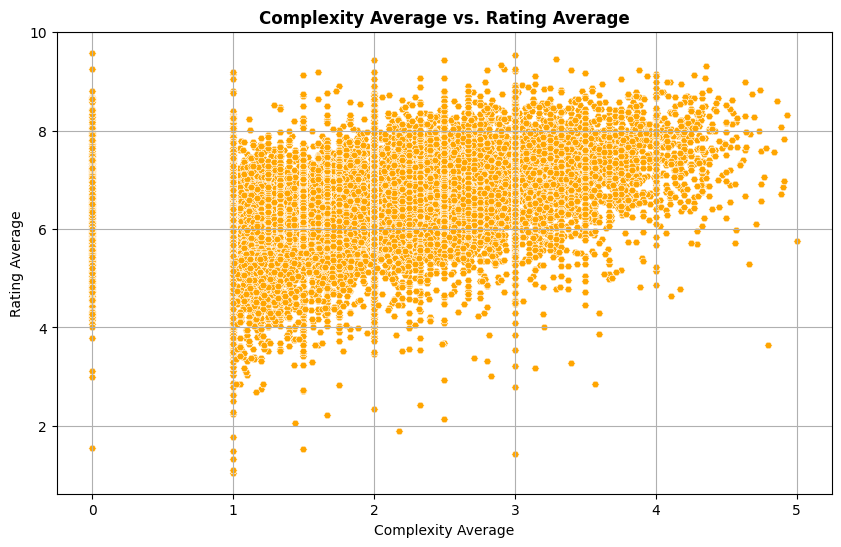

In [26]:
#functionalize a scatter plot comparing any two numerical features

def bgg_scatter_plot(df, column_x, column_y, color):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.scatterplot(data=df, x=column_x, y=column_y, color = color, marker='H', s=30)
    plt.xlabel(column_x)
    plt.ylabel(column_y)
    plt.title(f'{column_x} vs. {column_y}', fontweight='bold')
    ax.grid(True)
    return fig, ax

bgg_scatter_plot(bgg_clean, 'Complexity Average', 'Rating Average', 'orange')

#function works on a base level, additional customization may need to be added for more advanced features

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Complexity Average vs. Rating Average'}, xlabel='Complexity Average', ylabel='Rating Average'>)

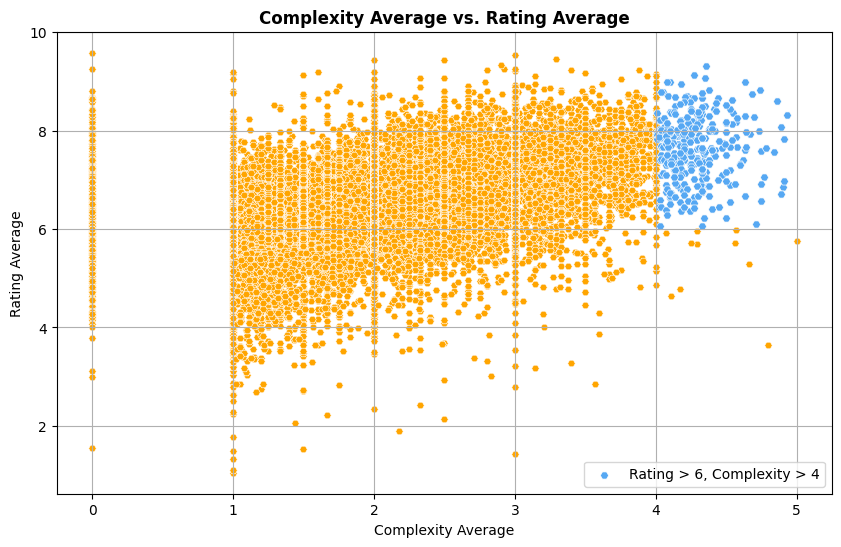

In [27]:
#engage in more customization to make it presentation quality

def bgg_scatter_plot(df, column_x, column_y, color):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.scatterplot(data=df, x=column_x, y=column_y, color = color, marker='H', s=30)
    highlight = df[(df[column_x] > 4) & (df[column_y] > 6)] #highlighting the points that lie above 4 in complexity and 7 in rating
    sns.scatterplot(data=highlight, x=column_x, y=column_y, color='#56A8F3', marker='H', s=35, label='Rating > 6, Complexity > 4')
    plt.xlabel(column_x)
    plt.ylabel(column_y)
    plt.title(f'{column_x} vs. {column_y}', fontweight='bold')
    ax.grid(True)
    plt.legend(loc='lower right') #move legend to bottom right so it isn't blocking any data points
    return fig, ax

bgg_scatter_plot(bgg_clean, 'Complexity Average', 'Rating Average', 'orange')

There is something interesting that can be seen in the scatter plot above. There seems to be an emerging strata which forms on the 1, 1.5, 2, 2.5, 3... values of Complexity Average. These newfound groupings could be an a new distinct pattern within the dataset that wasn't apparent before. This could certainly be worth digging more into in the future.

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Rating Average vs. BGG Rank'}, xlabel='Rating Average', ylabel='BGG Rank'>)

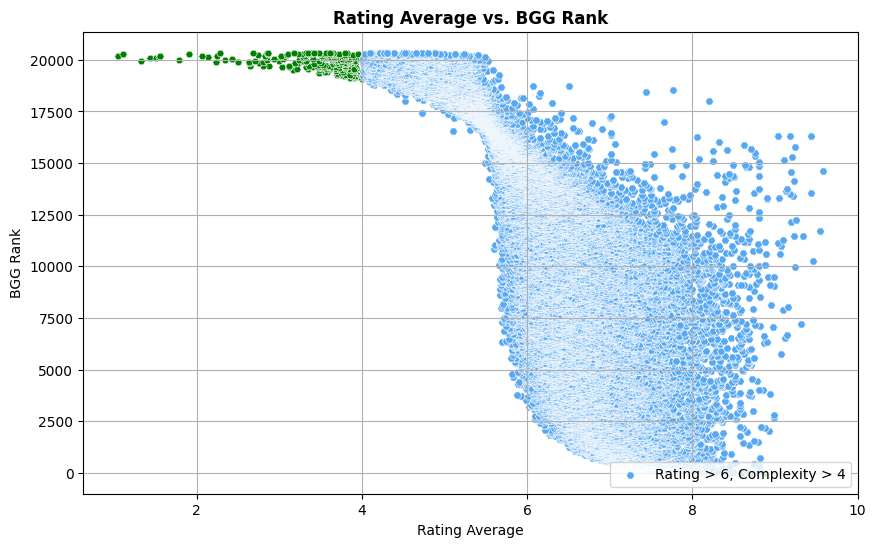

In [28]:
#try function with different columns

bgg_scatter_plot(bgg_clean, 'Rating Average', 'BGG Rank', 'green')

Interpretation:
Despite the large number of data points shown in both scatter plots, a general sense of correlation is still reflected.

### What are the most popular mechanics and domains?
Mechanics and domains are a little trickier to deal with due to the nature of its values. They all possess one or more strings in its value. Filtering will need to take place before we can create visuals and identify popularity.

In [29]:
#check unique values of Mechanics
len(bgg_clean['Mechanics'].unique())
#way too many unique values if we don't break up the strings in each column

7379

In [30]:
#we need to loop through each value of each column separated by a comma to check if it is unique or not
#if the value is unique, we store it into a list of unique mechanics

unique_mechanics = set()

for index, row in bgg_clean.iterrows():
  mechanics = row['Mechanics'].split(', ')
  for mechanic in mechanics:
        unique_mechanics.add(mechanic)

unique_mechanics = list(unique_mechanics)

<ipython-input-31-22211500183d>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=list(mechanics), y=list(counts), palette=palette, ax=ax)


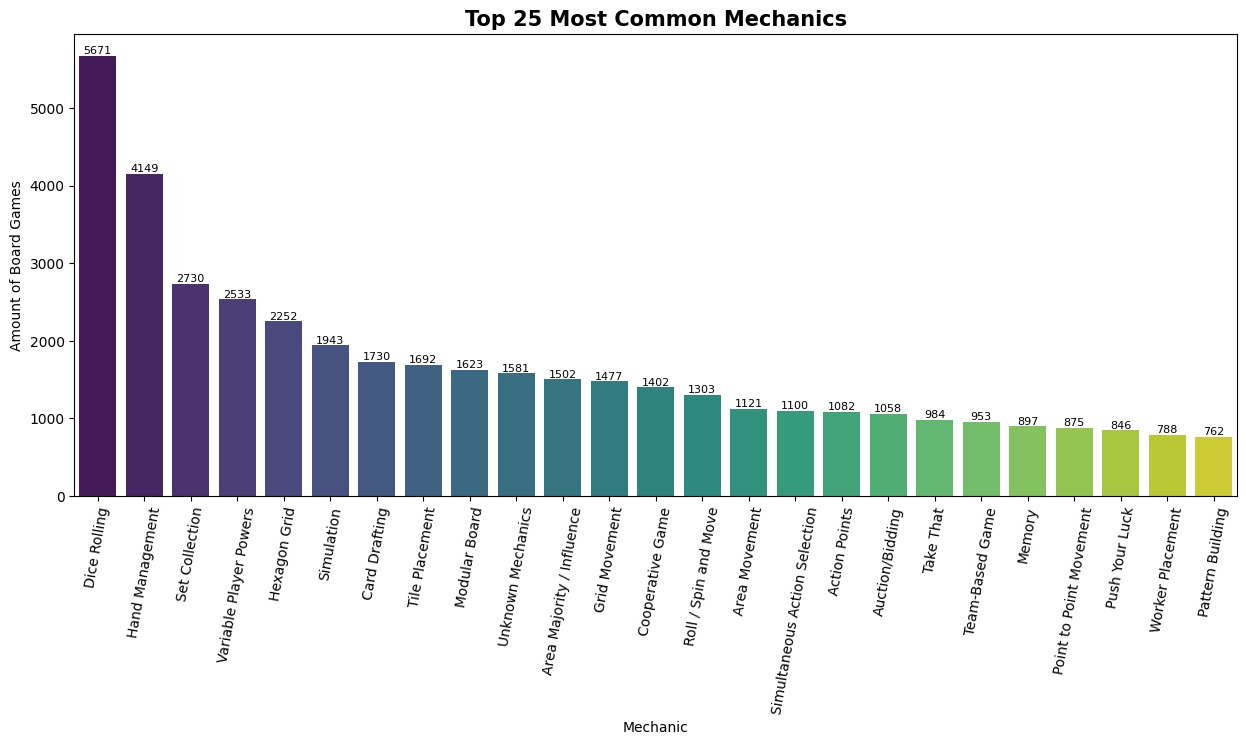

In [31]:
#plot the top 25 mechanics in a frequency bar chart

mechanic_counts = {}
for index, row in bgg_clean.iterrows():
    mechanics = row['Mechanics'].split(', ')
    for mechanic in mechanics:
        if mechanic in mechanic_counts:
            mechanic_counts[mechanic] += 1
        else:
            mechanic_counts[mechanic] = 1

# sort the mechanics by frequency (in descending order)
sorted_mechanics = sorted(mechanic_counts.items(), key=lambda x: x[1], reverse=True)

top_25_mechanics = sorted_mechanics[:25]

mechanics, counts = zip(*top_25_mechanics)

fig, ax = plt.subplots(figsize=(15, 6))
palette = sns.color_palette('viridis', len(mechanics))
bars = sns.barplot(x=list(mechanics), y=list(counts), palette=palette, ax=ax)
plt.xticks(rotation=80)
plt.xlabel('Mechanic')
plt.ylabel('Amount of Board Games')
plt.title('Top 25 Most Common Mechanics', fontsize=15, fontweight='bold')
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.25,
            f'{height:.0f}', ha='center', va='bottom', color='black', fontsize=8)

plt.show()


A large amount of board games possess the dice rolling mechanic in its game. This graph gives us a good understanding of which individual mechanics are common in the dataset.

<ipython-input-32-6f46d9989761>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=list(domains), y=list(counts), palette=palette, ax=ax)


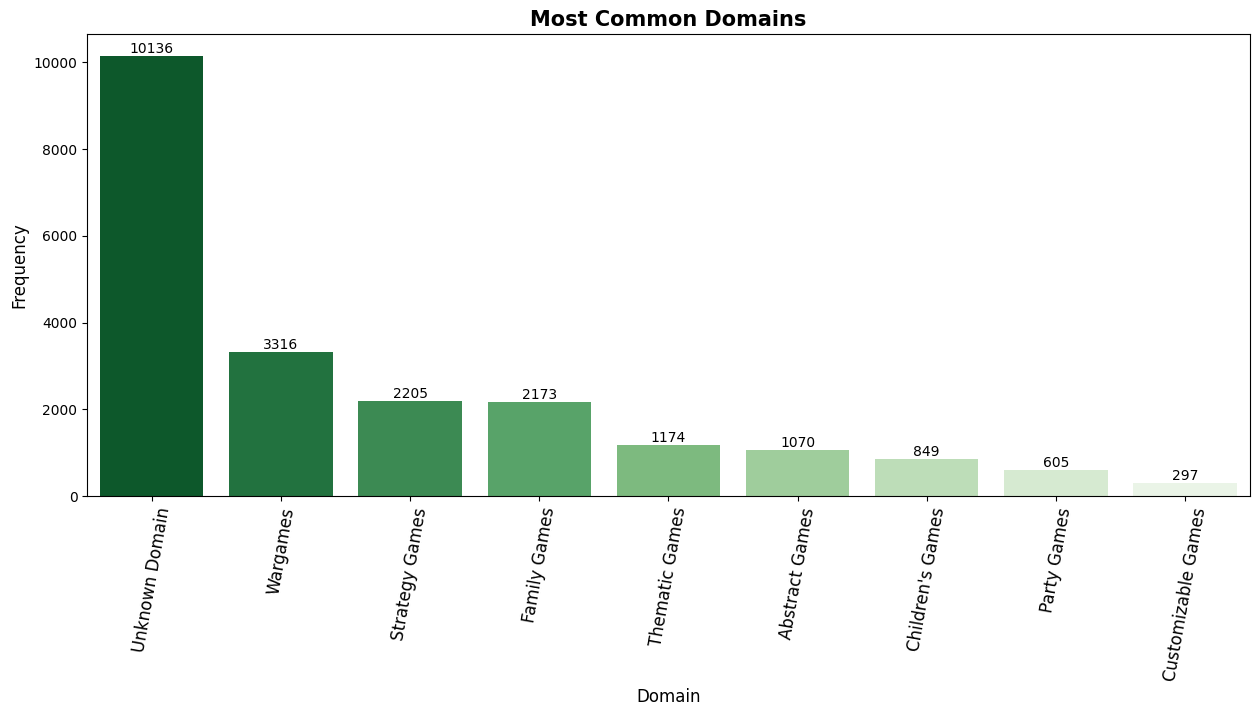

In [32]:
#now we need to filter the Domains column and create a graph

domains_counts = {}
for index, row in bgg_clean.iterrows():
    domains = row['Domains'].split(', ')
    for domain in domains:
        if domain in domains_counts:
            domains_counts[domain] += 1
        else:
            domains_counts[domain] = 1

# sort the mechanics by frequency (in descending order)
sorted_domains = sorted(domains_counts.items(), key=lambda x: x[1], reverse=True)

top_25_domains = sorted_domains[:25]

domains, counts = zip(*top_25_domains)

fig, ax = plt.subplots(figsize=(15, 6))
palette = sns.color_palette('Greens', len(domains))[::-1]
bars = sns.barplot(x=list(domains), y=list(counts), palette=palette, ax=ax)
plt.xticks(rotation=80, fontsize = 12)
plt.xlabel('Domain', fontsize=12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Most Common Domains', fontsize=15, fontweight='bold')
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.25,
            f'{height:.0f}', ha='center', va='bottom', color='black', fontsize=10)


In [33]:
len(bgg_clean[bgg_clean['Domains'] != 'Unknown Domain'])

10184

The dataset is mostly comprised of domains that are unknown, likely due to domain being a relatively new part of the data collection process. 3,316 out of the known 10,184 board game domains are Wargames. Wargames and Strategy Games might be the types of games people have been enjoying recently.

###How has Play Time changed in the most recent five years compared to an earlier five years in time?
I had suspected that there may have been a decrease in Play Time within society in recent years, potentially due to decreases in attention span. By comparing histograms from 2018-2022 of Play Time data to 2000-2004 data.

In [34]:
#check the most recent year of the dataset

bgg_clean['Year Published'].max()

#we should be looking at data between 2018-2022 first

2022

In [109]:
#filter dataframe to only include games published between 2018-2022
recent_bgg = bgg_clean[bgg_clean['Year Published'].isin([2018, 2019, 2020, 2021, 2022])]

#isolate play time
recent_bgg_pt1 = recent_bgg['Play Time'] < 300
recent_bgg_pt = recent_bgg[recent_bgg_pt1]['Play Time']
recent_bgg_pt_counts = recent_bgg_pt.value_counts()

In [134]:
#filter dataframe to only include games published between 2000-2005
bgg_2000 = bgg_clean[bgg_clean['Year Published'].isin([2000, 2001, 2002, 2003, 2004])]

bgg_2000_pt1 = bgg_2000['Play Time'] < 300
bgg_2000_pt = bgg_2000[bgg_2000_pt1]['Play Time']

bgg_2000_pt_counts = bgg_2000_pt.value_counts()

<ipython-input-136-f13596bfc2f2>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=80)
<ipython-input-136-f13596bfc2f2>:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=80)


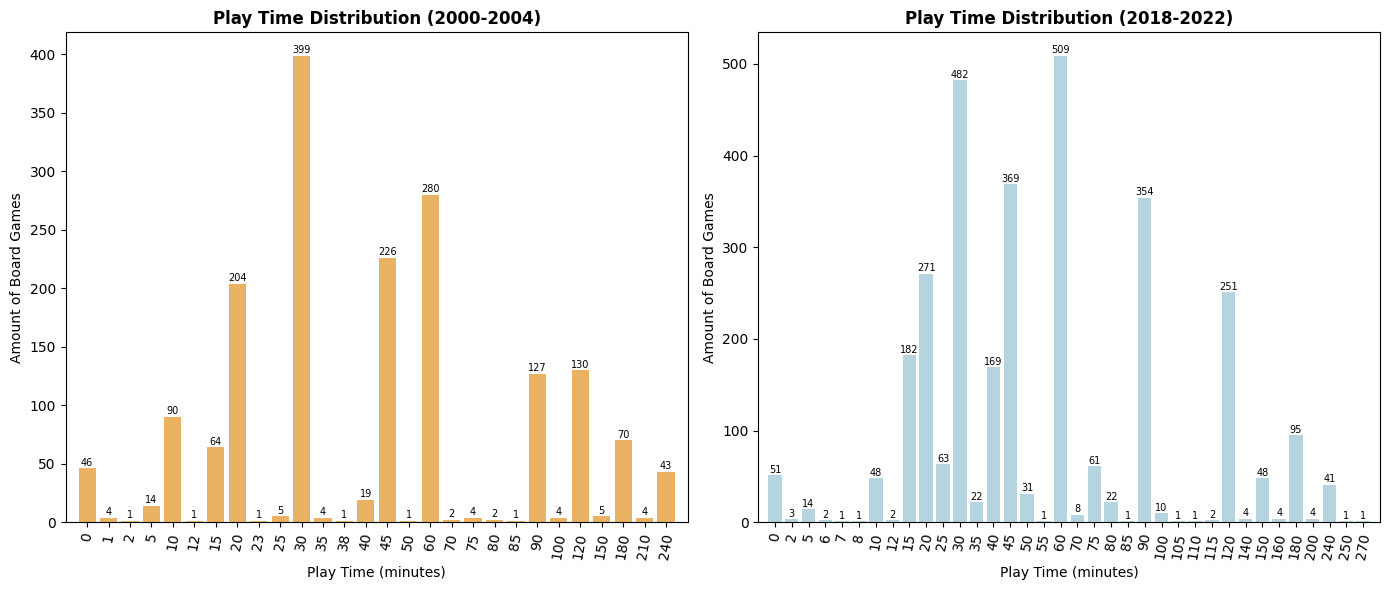

In [136]:
#create the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

#plot the first histogram on the first axis
sns.barplot(x=recent_bgg_pt_counts.index, y=recent_bgg_pt_counts.values, ax=ax2, color='lightblue')
ax2.set_title('Play Time Distribution (2018-2022)', fontweight='bold')
ax2.set_xlabel('Play Time (minutes)')
ax2.set_ylabel('Amount of Board Games')
ax2.set_xlim(-1, 36)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=80)
for p in ax2.patches:
    ax2.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, f'{p.get_height():.0f}',
             ha='center', va='bottom', color='black', fontsize=7)

#plot the second histogram on the second axis
sns.barplot(x=bgg_2000_pt_counts.index, y=bgg_2000_pt_counts.values, ax=ax1, color='#FFB84D')
ax1.set_title('Play Time Distribution (2000-2004)', fontweight='bold')
ax1.set_xlabel('Play Time (minutes)')
ax1.set_ylabel('Amount of Board Games')
ax1.set_xlim(-1, 28)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=80)
for p in ax1.patches:
    ax1.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, f'{p.get_height():.0f}',
             ha='center', va='bottom', color='black', fontsize=7)

#display the plot
plt.tight_layout()
plt.show()

The data actually was the opposite of what I expected. Play time has generally increased in recent years compared to the past. Between 2000-2004, 30 minute play time was the most popular, and in 2018-2022 60 minute play time is the most popular. This could be due to more creative game development, leading to games that are more dynamic and take more time.

### What is the spread of Users Rated of the dataset? Should all reviews be weighted equally? Any concerns?

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Frequency Histogram for Users Rated'}, xlabel='Users Rated', ylabel='# of Board Games'>)

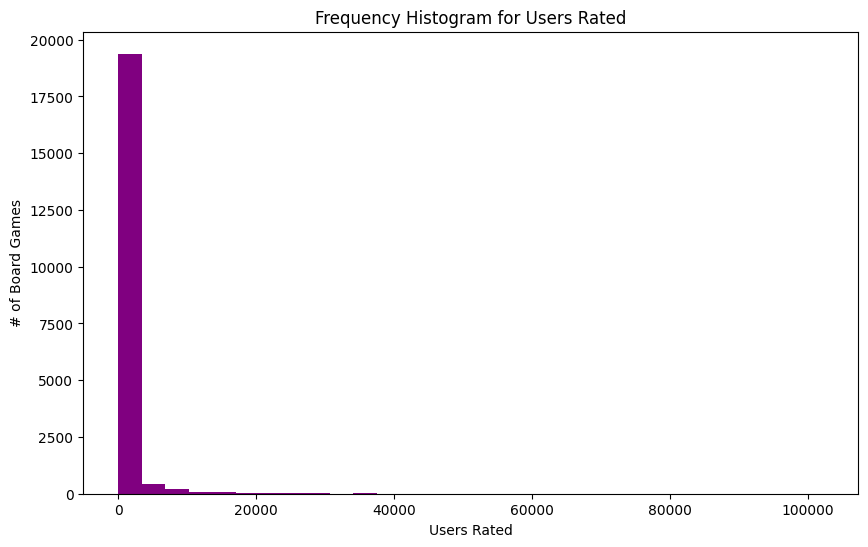

In [104]:
#create histogram to show spread of 'Users Rated' column

# fig, ax = plt.subplots(figsize=(10, 6))
# plt.hist(bgg_clean['Users Rated'], bins = 30, color='Purple')
# plt.title('Frequency Histogram for Number of Users Rated')
# plt.xlabel('# of Users Rated')
# plt.ylabel('Frequency')

#functionalize it so any dataframe or column can be made into a histogram

def frequency_histogram(df, column):
  fig, ax = plt.subplots(figsize=(10, 6))
  plt.hist(df[column], bins = 30, color='Purple')
  plt.title(f'Frequency Histogram for {column}')
  plt.xlabel(column)
  plt.ylabel('# of Board Games')
  return fig, ax

frequency_histogram(bgg_clean, 'Users Rated')

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Frequency Histogram for Min Age'}, xlabel='Min Age', ylabel='# of Board Games'>)

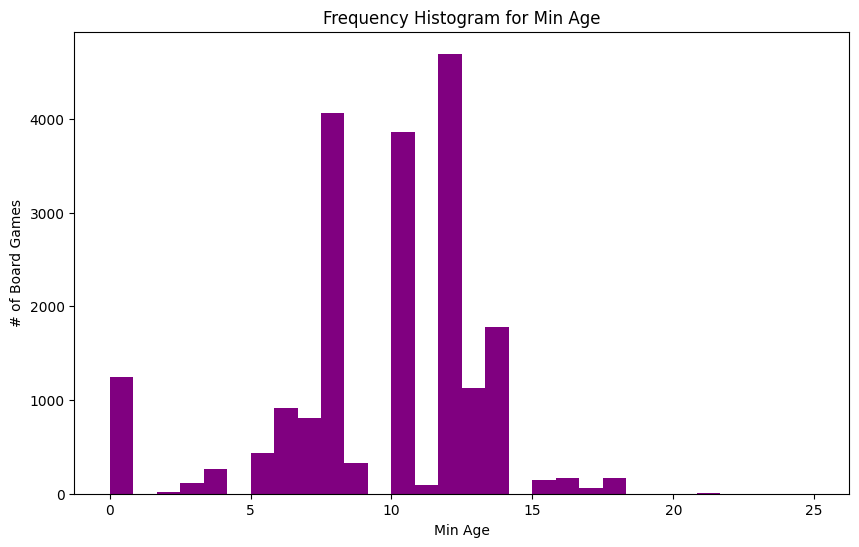

In [105]:
#try function with Min Age

frequency_histogram(bgg_clean, 'Min Age')

This could pose issues with other analyses because board games with such low number of user ratings shouldn't hold equal amount of weight for measures such as average rating. If the average of the feature 'Rating Average' were to be found, then a 8.3 rating with 90,000 user ratings would be weighted just as much as a 5.2 rating with 90 user ratings.

In [ ]:
#create a variable for the number of board games with less than the value of average user ratings (841.77)

under_average = (bgg_clean['Users Rated'] < bgg_clean['Users Rated'].mean()).sum()

#how many rows have a users rated value less than the average users rated of the dataset (841.77)?
(len(bgg_clean)) - under_average

2999

Considering the goal of our investigation is to understand the most popular games and its features

### What are the top features of the top 3,000 board games by Users Owned?

We can learn a great deal about what game should be created by looking at which games garner the most purchases and highest average ratings.

In [35]:
#create a variable to store the dataframe of the top 3,000 board games according to the number of owned users

top_3k_ou = bgg_clean.sort_values(by='Owned Users', ascending=False).iloc[:3000]

top_3k_ou

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
98,30549.0,Pandemic,2008,2,4,45,8,102214,7.61,99,2.41,155312,"Action Points, Cooperative Game, Hand Manageme...","Family Games, Strategy Games"
394,13.0,Catan,1995,3,4,120,10,101510,7.15,395,2.32,154531,"Dice Rolling, Hexagon Grid, Income, Modular Bo...","Family Games, Strategy Games"
177,822.0,Carcassonne,2000,2,5,45,7,101853,7.42,178,1.91,149337,"Area Majority / Influence, Map Addition, Tile ...",Family Games
60,68448.0,7 Wonders,2010,2,7,30,10,84371,7.75,61,2.33,112410,"Card Drafting, Drafting, Hand Management, Set ...","Family Games, Strategy Games"
92,178900.0,Codenames,2015,2,8,15,14,67688,7.62,93,1.29,107682,"Communication Limits, Memory, Push Your Luck, ...",Party Games
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,238393.0,Monolith Arena,2018,2,4,45,10,889,7.71,1483,2.42,1671,"Hand Management, Hexagon Grid, Player Eliminat...",Strategy Games
15773,17136.0,DaVinci's Challenge,2004,2,4,30,8,623,5.57,15775,2.06,1670,"Pattern Recognition, Tile Placement",Abstract Games
2301,3236.0,WildLife,2002,2,6,120,10,1345,6.66,2303,3.07,1669,"Area Majority / Influence, Auction/Bidding, Ti...",Strategy Games
19050,1417.0,Alibi,1993,3,10,45,10,692,5.46,19052,1.82,1669,"Set Collection, Trading",Family Games


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Histogram for Rating Average of the Top 3,000 Owned Games'}, xlabel='Rating Average', ylabel='Amount of Board Games'>)

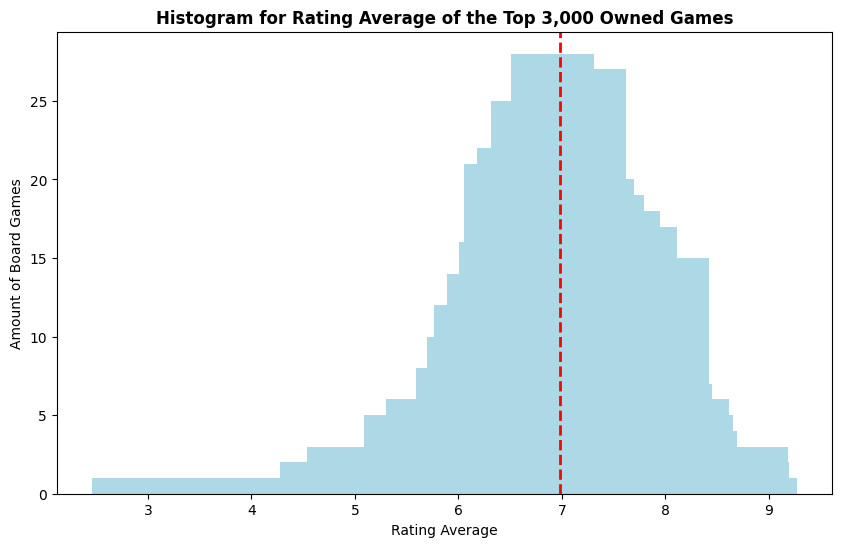

In [52]:
#functionalize creating a bar chart with any feature within the top 3,000 dataframe

def frequency_bar(df, column):
  fig, ax = plt.subplots(figsize=(10, 6))
  value_counts = df[column].value_counts()
  plt.bar(value_counts.index, value_counts.values, color='lightblue')
  plt.title(f'Histogram for {column} of the Top 3,000 Owned Games', fontweight = 'bold')
  plt.xlabel(column)
  plt.ylabel('Amount of Board Games')
  median_value = np.median(df[column])
  plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
  return fig, ax

frequency_bar(top_3k_ou, 'Rating Average')


<ipython-input-51-f7975bc1c8eb>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=list(domains), y=list(counts), palette=palette, ax=ax)


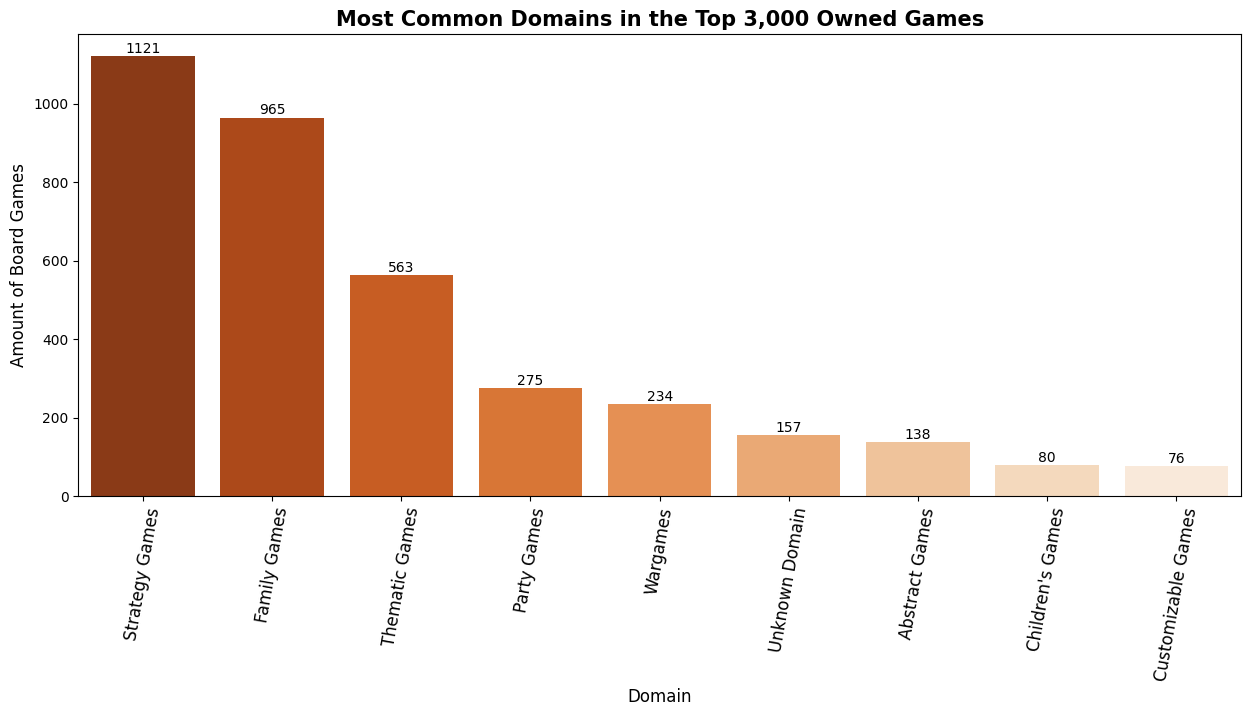

In [51]:
#domain code from earlier, replace with the top 3,000 dataframe

domains_counts = {}
for index, row in top_3k_ou.iterrows():
    domains = row['Domains'].split(', ')
    for domain in domains:
        if domain in domains_counts:
            domains_counts[domain] += 1
        else:
            domains_counts[domain] = 1

# sort the mechanics by frequency (in descending order)
sorted_domains = sorted(domains_counts.items(), key=lambda x: x[1], reverse=True)

top_25_domains = sorted_domains[:25]

domains, counts = zip(*top_25_domains)

fig, ax = plt.subplots(figsize=(15, 6))
palette = sns.color_palette('Oranges', len(domains))[::-1]
bars = sns.barplot(x=list(domains), y=list(counts), palette=palette, ax=ax)
plt.xticks(rotation=80, fontsize = 12)
plt.xlabel('Domain', fontsize=12)
plt.ylabel('Amount of Board Games', fontsize = 12)
plt.title('Most Common Domains in the Top 3,000 Owned Games', fontsize=15, fontweight='bold')
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.25,
            f'{height:.0f}', ha='center', va='bottom', color='black', fontsize=10)

<ipython-input-55-8edd02a8ce9c>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=list(mechanics), y=list(counts), palette=palette, ax=ax)


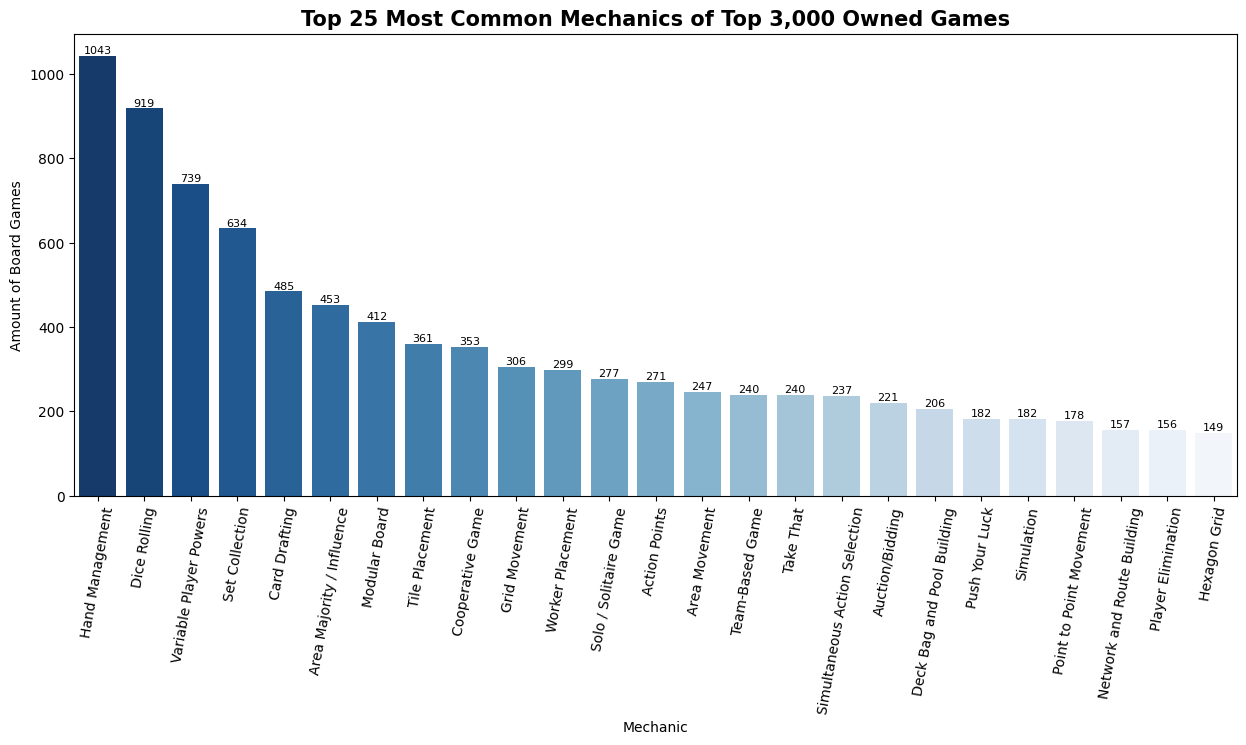

In [55]:
#mechanic code from earlier but this time replace the dataframe in which it is running on to the top 3,000 one
mechanic_counts = {}
for index, row in top_3k_ou.iterrows():
    mechanics = row['Mechanics'].split(', ')
    for mechanic in mechanics:
        if mechanic in mechanic_counts:
            mechanic_counts[mechanic] += 1
        else:
            mechanic_counts[mechanic] = 1

# sort the mechanics by frequency (in descending order)
sorted_mechanics = sorted(mechanic_counts.items(), key=lambda x: x[1], reverse=True)

top_25_mechanics = sorted_mechanics[:25]

mechanics, counts = zip(*top_25_mechanics)

fig, ax = plt.subplots(figsize=(15, 6))
palette = sns.color_palette('Blues', len(mechanics))[::-1]
bars = sns.barplot(x=list(mechanics), y=list(counts), palette=palette, ax=ax)
plt.xticks(rotation=80)
plt.xlabel('Mechanic')
plt.ylabel('Amount of Board Games')
plt.title('Top 25 Most Common Mechanics of Top 3,000 Owned Games', fontsize=15, fontweight='bold')
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.25,
            f'{height:.0f}', ha='center', va='bottom', color='black', fontsize=8)

plt.show()
